# 미국 주식 거래량 상위 종목 추출 및 이메일 전송
- 이 프로그램은 야후 파이낸스 Most Active Stocks 100개 종목을 추출해 거래량,시가총액 등 기준에 따라 변형하여 사용할 수 있는 프로그램입니다.
- csv 파일과 그래프를 메일로 전송할 수 있습니다.

## Requests 라이브러리 설치

In [84]:
!pip install requests --upgrade --quiet
import requests

In [85]:
url = 'https://finance.yahoo.com/most-active?count=100&offset=0'

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36',
           'From' : 'shiningchae@gmail.com'
          }

response = requests.get(url, headers=headers)

In [86]:
response.status_code

200

In [87]:
url_contents = response.text

url_contents[:1000]

'<!DOCTYPE html><html data-color-theme="light" id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charSet="utf-8"/><title>Most Active Stocks Today - Yahoo Finance</title><meta name="keywords" content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="See the list of the most active stocks today, including share price change and percentage, trading volume, intraday highs and lows, an

## URL을 html 파일로 저장하기

In [88]:
with open('yahoo-finance-most_active.html', 'w', encoding="utf-8") as file:
    file.write(url_contents)

In [89]:
def download_web_page(url, html_title):
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36',
           'From' : 'shiningchae@gmail.com'
              }
    response = requests.get(url, headers=headers)
    status_code = response.status_code
    if status_code in range(200,300):
        url_contents = response.text
        with open('new-downloaded-web-page.html', 'w', encoding="utf-8") as file:
            file.write(url_contents)
        print('Status code is within an okay range of {}.'.format(status_code))
        
    else:
        return

## 문자열 파싱을 위한 BeautifulSoup 라이브러리 설치

In [90]:
!pip install beautifulsoup4 --upgrade --quiet
from bs4 import BeautifulSoup

In [91]:
with open('yahoo-finance-most_active.html', 'r') as f:
    html_source = f.read()
    
len(html_source)

1400622

In [92]:
doc = BeautifulSoup(html_source, 'html.parser')

In [93]:
title = doc.title

title.text

'Most Active Stocks Today - Yahoo Finance'

In [94]:
# 주식 정보는 tr_tag에 위치해 있음. 모든 클래스 타입에 공통되는 simpTblRow 클래스를 사용

tr_class_tags = doc.find_all('tr',class_='simpTblRow')
tr_class_tags[:2]

[<tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input class="Pos(a) V(h)" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) Stk($plusGray)! Fill($plusGray)! Cur(p)" data-icon="checkbox-unchecked" height="16" style="fill:#000;stroke:#000;stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/AMD?p=AMD" title="Advanced Micro Devices, Inc.">AMD</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFak

## most active stocks에는 상위 100개의 주식이 있으므로 100개가 맞는지를 확인하기

In [95]:
tr_tag_amount = len(tr_class_tags)
if tr_tag_amount == 100:
    print("We have the correct amount of tr tags.")

We have the correct amount of tr tags.


## 첫번째 tr_tag는 거래량 1순위인 AMD임을 확인할 수 있음

In [96]:
tr_class_tag1 = tr_class_tags[0]
tr_class_tag1

<tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input class="Pos(a) V(h)" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) Stk($plusGray)! Fill($plusGray)! Cur(p)" data-icon="checkbox-unchecked" height="16" style="fill:#000;stroke:#000;stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/AMD?p=AMD" title="Advanced Micro Devices, Inc.">AMD</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFake

## tr_tag 아래 td_tag에 주식 티커를 추출할 a_tag가 있음
- 주식 티커는 주식을 나타내는 일종의 줄임말임

In [97]:
td_tag = tr_class_tag1.find_all('td')
td_tag

[<td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input class="Pos(a) V(h)" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) Stk($plusGray)! Fill($plusGray)! Cur(p)" data-icon="checkbox-unchecked" height="16" style="fill:#000;stroke:#000;stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/AMD?p=AMD" title="Advanced Micro Devices, Inc.">AMD</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td>,
 <td aria-label="Name" class="Va(m) Ta(start) Px(10px) Fz(s)" colspan="">

In [98]:
a_tag = td_tag[0].find_all('a', recursive=False)
a_tag

[<a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/AMD?p=AMD" title="Advanced Micro Devices, Inc.">AMD</a>]

In [99]:
ticker_name = a_tag[0].text.strip()
ticker_name

'AMD'

In [100]:
name_tag = td_tag[1].text
name_tag

'Advanced Micro Devices, Inc.'

In [101]:
price_tag = td_tag[2].text
price_tag

'80.24'

In [102]:
daily_change_tag = td_tag[3].text
daily_change_tag

'-2.09'

In [103]:
daily_percentage_change_tag = td_tag[4].text
daily_percentage_change_tag

'-2.54%'

In [104]:
volume_tag = td_tag[5].text
volume_tag

'84.924M'

In [105]:
avg_volume_tag = td_tag[6].text
avg_volume_tag

'84.344M'

In [106]:
market_cap_tag = td_tag[7].text
market_cap_tag

'129.533B'

In [107]:
pe_ratio_tag = td_tag[8].text
pe_ratio_tag

'35.19'

## M,k,B 등을 백만, 천만, 10억으로 각각 나타내는 방법

In [108]:
def parse_volume_market_tag(tag):
    volume_str = tag.strip()
    if volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'k':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)    
    elif volume_str[-1] == 'T':
        return int(float(volume_str[:-1]) * 1000000000000)
    else:
        return int(float(volume_str))

In [109]:
parse_volume_market_tag('200.4B')

200400000000

In [110]:
def parse_stocks(tr_class_tag):
    # <td> tags는 모든 주식 정보를 포함, <tr tags contain all of the individual details, <a> tags contain ticker name
    td_tag = tr_class_tag.find_all('td')
    a_tag = td_tag[0].find('a', recursive=False)
    
    #주식 티커
    ticker_name = a_tag.text.strip()
    
    #주식 이름
    name_tag = (td_tag[1].text).replace(",","")
    
    # 종가
    price_tag = float(td_tag[2].text)
    
    # 주가 변동
    daily_change_tag = td_tag[3].text
    
    # 퍼센티지 변동
    daily_percentage_change_tag = td_tag[4].text
    
    # 거래량
    volume_tag = parse_volume_market_tag(td_tag[5].text)
    
    # 평균 거래량
    avg_volume_tag = parse_volume_market_tag(td_tag[6].text)
    
    # 시가총액
    market_cap_tag = parse_volume_market_tag(td_tag[7].text)
    
    # PER
    pe_ratio_tag = td_tag[8].text
    
    # 딕셔너리로 리턴
    return {
        'Stock ticker' : ticker_name,
        'Stock name': name_tag,
        'Last price of stock' : price_tag,
        'Stock change' : daily_change_tag,
        'Stock percentage change' : daily_percentage_change_tag,
        'Volume' : volume_tag,
        'Average volume over 3 months' : avg_volume_tag,
        'Market cap' : market_cap_tag,
        'PE ratio' : pe_ratio_tag
    }

In [111]:
parse_stocks(tr_class_tags[0])

{'Stock ticker': 'AMD',
 'Stock name': 'Advanced Micro Devices Inc.',
 'Last price of stock': 80.24,
 'Stock change': '-2.09',
 'Stock percentage change': '-2.54%',
 'Volume': 84924000,
 'Average volume over 3 months': 84344000,
 'Market cap': 129532999999,
 'PE ratio': '35.19'}

In [112]:
parse_stocks(tr_class_tags[6])

{'Stock ticker': 'SNAP',
 'Stock name': 'Snap Inc.',
 'Last price of stock': 11.22,
 'Stock change': '-0.42',
 'Stock percentage change': '-3.61%',
 'Volume': 45735000,
 'Average volume over 3 months': 54759000,
 'Market cap': 18501000000,
 'PE ratio': 'N/A'}

In [113]:
def list_tickers(tr_class_tag):
    td_tag = tr_class_tag.find_all('td')
    a_tag = td_tag[0].find('a', recursive=False)
    
    # 주식 티커
    ticker_name = a_tag.text.strip()
    return ticker_name

In [114]:
list_tickers(tr_class_tags[5])

'TSLA'

In [115]:
stock_tickers = [list_tickers(x) for x in tr_class_tags]
stock_tickers[:6]

['AMD', 'AAPL', 'NVDA', 'F', 'AMZN', 'TSLA']

In [116]:
most_active_stocks = [parse_stocks(x) for x in tr_class_tags]
most_active_stocks[:3]

[{'Stock ticker': 'AMD',
  'Stock name': 'Advanced Micro Devices Inc.',
  'Last price of stock': 80.24,
  'Stock change': '-2.09',
  'Stock percentage change': '-2.54%',
  'Volume': 84924000,
  'Average volume over 3 months': 84344000,
  'Market cap': 129532999999,
  'PE ratio': '35.19'},
 {'Stock ticker': 'AAPL',
  'Stock name': 'Apple Inc.',
  'Last price of stock': 155.81,
  'Stock change': '-2.15',
  'Stock percentage change': '-1.36%',
  'Volume': 76958000,
  'Average volume over 3 months': 73365000,
  'Market cap': 2504000000000,
  'PE ratio': '25.75'},
 {'Stock ticker': 'NVDA',
  'Stock name': 'NVIDIA Corporation',
  'Last price of stock': 136.47,
  'Stock change': '-2.90',
  'Stock percentage change': '-2.08%',
  'Volume': 74203000,
  'Average volume over 3 months': 52886000,
  'Market cap': 340083000000,
  'PE ratio': '36.60'}]

## CSV 파일로 만들기

In [117]:
def write_csv(items, path):
    with open(path, 'w') as f:
        if len(items) == 0:
            return
        
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')
        
        for item in items:
            values = []
            
            for header in headers:
                values.append(str(item.get(header,"")))
            f.write(','.join(values) + "\n")
            
            

In [118]:
write_csv(most_active_stocks, 'most-active-stocks.csv')

In [119]:
with open('most-active-stocks.csv', 'r') as f:
    print(f.read())

Stock ticker,Stock name,Last price of stock,Stock change,Stock percentage change,Volume,Average volume over 3 months,Market cap,PE ratio
AMD,Advanced Micro Devices Inc.,80.24,-2.09,-2.54%,84924000,84344000,129532999999,35.19
AAPL,Apple Inc.,155.81,-2.15,-1.36%,76958000,73365000,2504000000000,25.75
NVDA,NVIDIA Corporation,136.47,-2.90,-2.08%,74203000,52886000,340083000000,36.60
F,Ford Motor Company,15.16,-0.03,-0.20%,64565000,60943000,60947000000,5.26
AMZN,Amazon.com Inc.,127.51,-0.31,-0.24%,57430000,64512000,1299000000000,113.85
TSLA,Tesla Inc.,270.21,-6.95,-2.51%,49863000,83703000,846695000000,96.85
SNAP,Snap Inc.,11.22,-0.42,-3.61%,45735000,54759000,18501000000,N/A
NIO,NIO Inc.,17.73,-1.06,-5.64%,44132000,50948000,29659000000,N/A
BAC,Bank of America Corporation,33.43,-0.04,-0.12%,44001000,41441000,268618000000,10.45
CCL,Carnival Corporation & plc,9.37,+0.02,+0.21%,39678000,55062000,12018000000,N/A
ITUB,Itaú Unibanco Holding S.A.,5.07,+0.10,+2.01%,38561000,43607000,45768000000,9.75
T,

In [120]:
import pandas as pd

## Pandas 데이터프레임으로 나타내기

In [121]:
most_active_df = pd.read_csv('most-active-stocks.csv')
most_active_df

,Stock ticker,Stock name,Last price of stock,Stock change,Stock percentage change,Volume,Average volume over 3 months,Market cap,PE ratio
0,AMD,Advanced Micro Devices Inc.,80.24,-2.09,-2.54%,84924000,84344000,129532999999,35.19
1,AAPL,Apple Inc.,155.81,-2.15,-1.36%,76958000,73365000,2504000000000,25.75
2,NVDA,NVIDIA Corporation,136.47,-2.90,-2.08%,74203000,52886000,340083000000,36.60
3,F,Ford Motor Company,15.16,-0.03,-0.20%,64565000,60943000,60947000000,5.26
4,AMZN,Amazon.com Inc.,127.51,-0.31,-0.24%,57430000,64512000,1299000000000,113.85
...,...,...,...,...,...,...,...,...,...
95,STLA,Stellantis N.V.,13.09,-0.18,-1.36%,10444000,5182000,41154000000,2.71
96,NEM,Newmont Corporation,41.67,0.76,+1.86%,10426000,8822000,33073000000,44.33
97,MRVL,Marvell Technology Inc.,45.76,-0.21,-0.46%,10251000,9844000,38891000000,NaN
98,SBUX,Starbucks Corporation,82.94,-2.46,-2.88%,10337000,6652000,97988000000,23.36


## 시가총액 순으로 나열

In [122]:
order_by_mark_cap_df = most_active_df.sort_values('Market cap', ascending=False)
order_by_mark_cap_df

,Stock ticker,Stock name,Last price of stock,Stock change,Stock percentage change,Volume,Average volume over 3 months,Market cap,PE ratio
1,AAPL,Apple Inc.,155.81,-2.15,-1.36%,76958000,73365000,2504000000000,25.75
28,MSFT,Microsoft Corporation,256.06,-4.34,-1.67%,22485000,25113000,1910000000000,26.53
37,GOOG,Alphabet Inc.,108.68,-1.87,-1.69%,20618000,26334000,1412000000000,20.13
26,GOOGL,Alphabet Inc.,107.85,-1.89,-1.72%,24078000,32188000,1412000000000,19.79
4,AMZN,Amazon.com Inc.,127.51,-0.31,-0.24%,57430000,64512000,1299000000000,113.85
...,...,...,...,...,...,...,...,...,...
43,OPEN,Opendoor Technologies Inc.,4.10,-0.18,-4.21%,18193000,17732000,2578000000,NaN
53,RIG,Transocean Ltd.,3.56,0.16,+4.71%,15573000,19200000,2512000000,NaN
66,JBLU,JetBlue Airways Corporation,7.63,-0.07,-0.91%,13539000,10719000,2471000000,NaN
61,TELL,Tellurian Inc.,4.08,0.23,+5.97%,13889000,16886000,2305000000,NaN


## PE Ratio 순으로 나열

In [123]:
order_by_pe_ratio_df = most_active_df.sort_values('PE ratio', ascending=False)
order_by_pe_ratio_df

,Stock ticker,Stock name,Last price of stock,Stock change,Stock percentage change,Volume,Average volume over 3 months,Market cap,PE ratio
15,SHOP,Shopify Inc.,30.11,-1.16,-3.71%,31479000,33223000,38191000000,231.62
32,PCG,PG&E Corporation,12.55,0.02,+0.16%,21422000,13481000,30941000000,125.50
4,AMZN,Amazon.com Inc.,127.51,-0.31,-0.24%,57430000,64512000,1299000000000,113.85
5,TSLA,Tesla Inc.,270.21,-6.95,-2.51%,49863000,83703000,846695000000,96.85
47,PDD,Pinduoduo Inc.,72.19,0.77,+1.08%,16754999,13462000,91276000000,46.57
...,...,...,...,...,...,...,...,...,...
85,AZN,AstraZeneca PLC,60.69,-1.10,-1.78%,11309000,6517000,190048000000,NaN
91,GSAT,Globalstar Inc.,2.04,0.04,+2.00%,10851000,5429000,3674000000,NaN
92,ELAN,Elanco Animal Health Incorporated,15.37,-0.01,-0.07%,10836000,5320000,7287000000,NaN
97,MRVL,Marvell Technology Inc.,45.76,-0.21,-0.46%,10251000,9844000,38891000000,NaN


In [124]:
order_by_vol_df = most_active_df.sort_values('Volume', ascending=False)
order_by_vol_df

,Stock ticker,Stock name,Last price of stock,Stock change,Stock percentage change,Volume,Average volume over 3 months,Market cap,PE ratio
0,AMD,Advanced Micro Devices Inc.,80.24,-2.09,-2.54%,84924000,84344000,129532999999,35.19
1,AAPL,Apple Inc.,155.81,-2.15,-1.36%,76958000,73365000,2504000000000,25.75
2,NVDA,NVIDIA Corporation,136.47,-2.90,-2.08%,74203000,52886000,340083000000,36.60
3,F,Ford Motor Company,15.16,-0.03,-0.20%,64565000,60943000,60947000000,5.26
4,AMZN,Amazon.com Inc.,127.51,-0.31,-0.24%,57430000,64512000,1299000000000,113.85
...,...,...,...,...,...,...,...,...,...
95,STLA,Stellantis N.V.,13.09,-0.18,-1.36%,10444000,5182000,41154000000,2.71
96,NEM,Newmont Corporation,41.67,0.76,+1.86%,10426000,8822000,33073000000,44.33
98,SBUX,Starbucks Corporation,82.94,-2.46,-2.88%,10337000,6652000,97988000000,23.36
99,AFRM,Affirm Holdings Inc.,22.45,-0.71,-3.07%,10258000,14791000,6430000000,NaN


## Matplotlib 그래프로 변환하기

In [125]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [126]:
import matplotlib.pyplot as plt

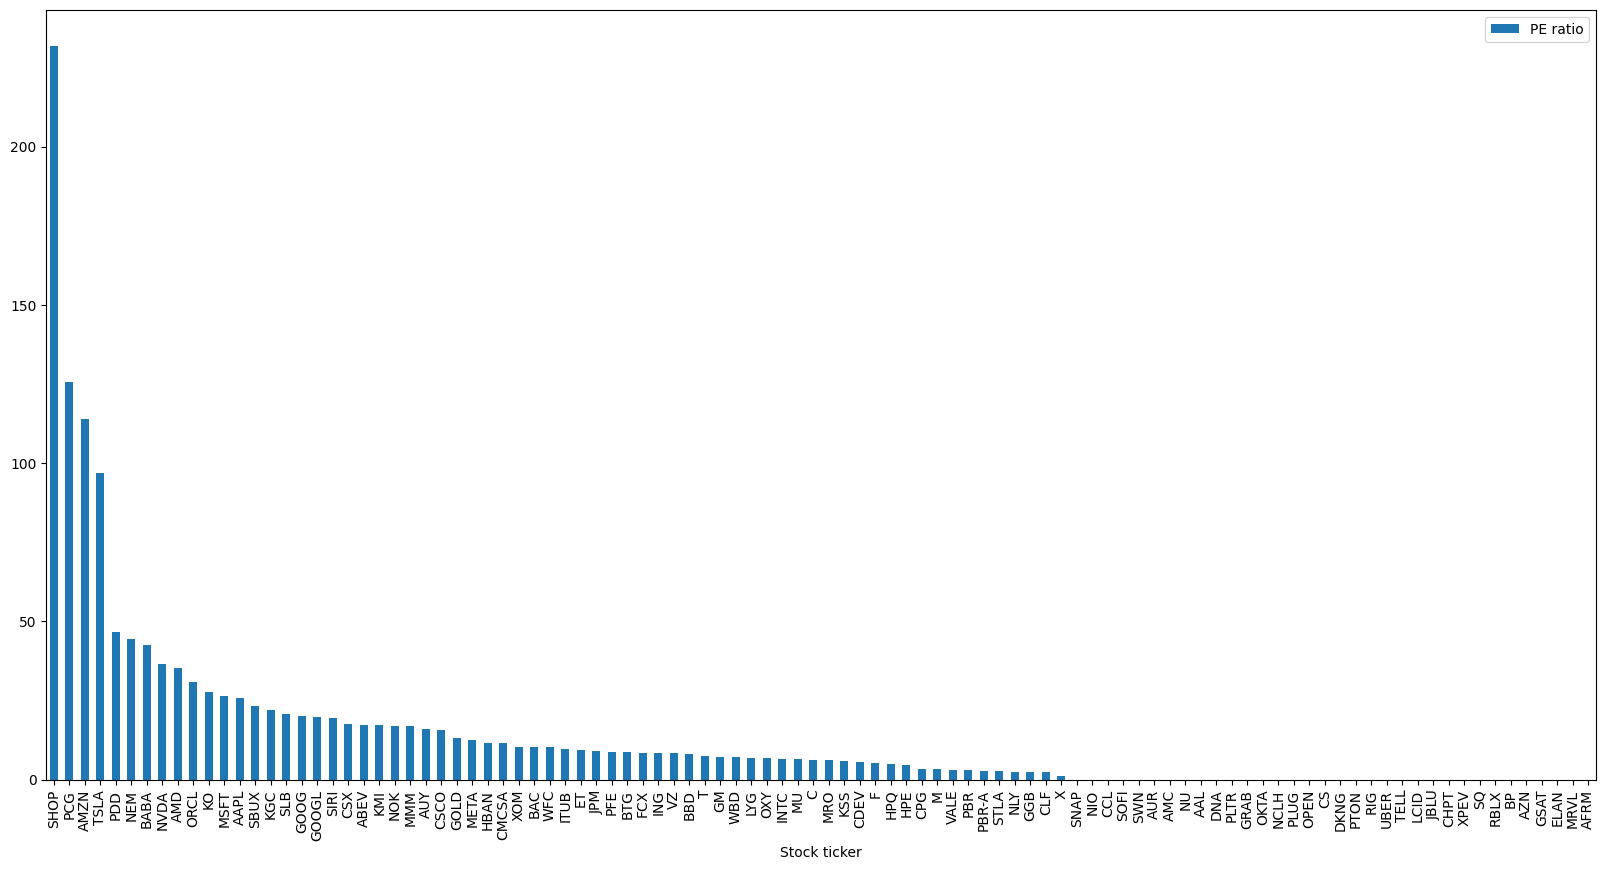

In [127]:
order_by_pe_ratio_df.plot(x = 'Stock ticker', y='PE ratio', kind = 'bar', figsize=(20,10))
plt.show()

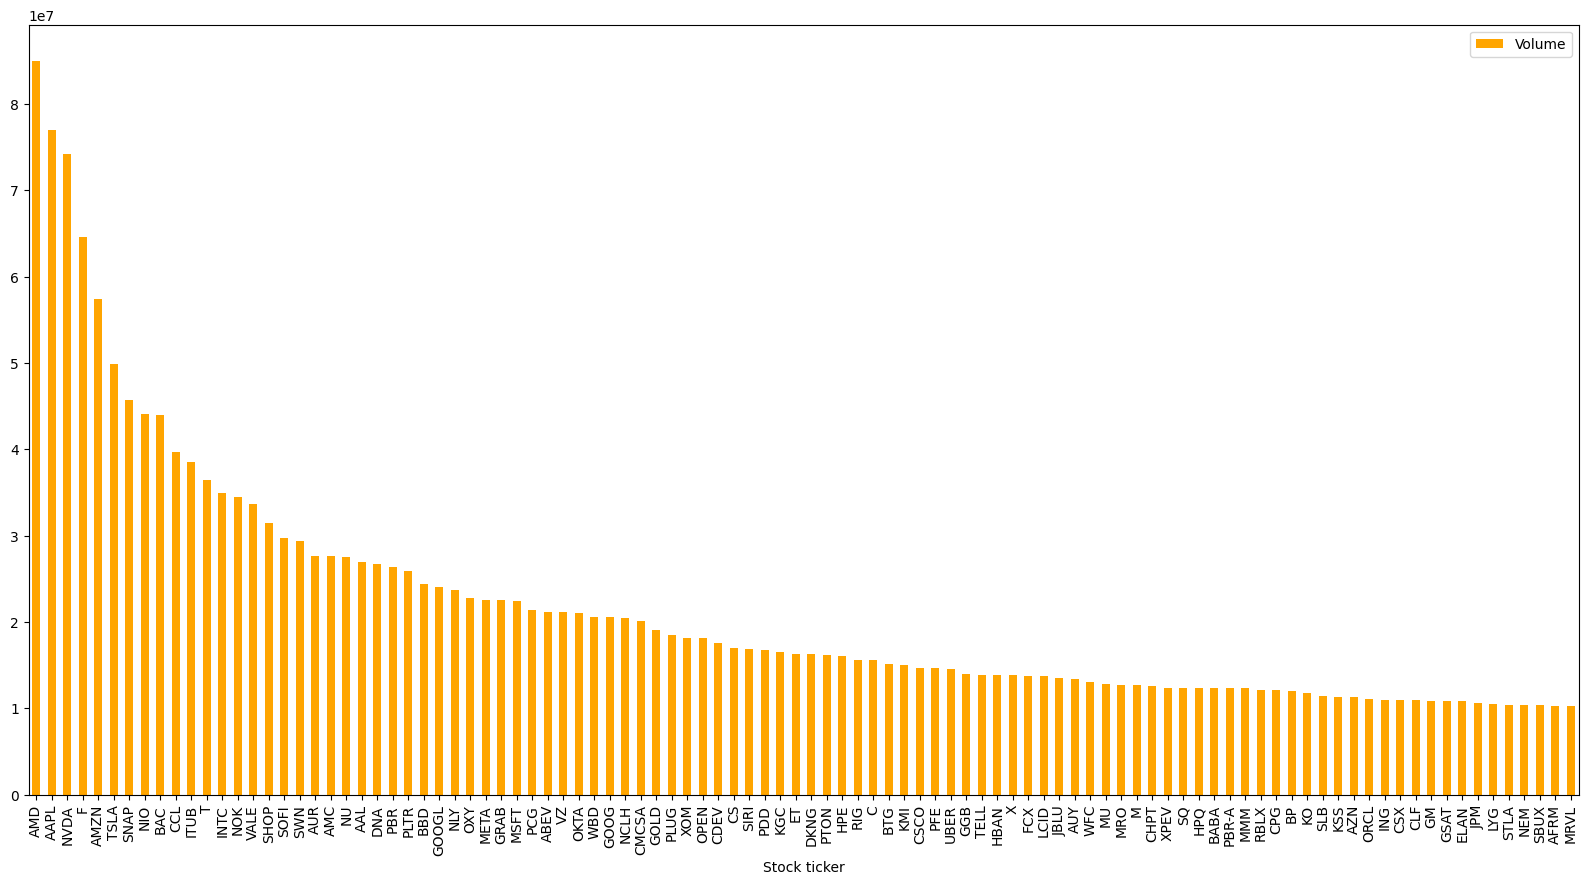

In [128]:
order_by_vol_df.plot(x = 'Stock ticker', y='Volume', kind = 'bar', figsize=(20,10), color = 'orange')
# plt.show()

plt.savefig('new_1.png')

## CSV 파일과 함께 이메일로 전송하기

In [129]:
import smtplib

gmail_smtp = "smtp.gmail.com"
gmail_port = 465
smpt = smtplib.SMTP_SSL(gmail_smtp, gmail_port)
print(smpt)

In [130]:
my_id = "cekdirect@gmail.com"
my_password = "codms2022!"
smpt.login('cekdirect@gmail.com', 'nigplygiqrvishfs')

(235, b'2.7.0 Accepted')

In [131]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders

msg = MIMEMultipart()
msg["subject"] = f"거래량 상위 종목 업데이트"
msg["From"] = "cekdirect@gmail.com"
msg["To"] = "shiningchae@gmail.com"

from email.mime.text import MIMEText

content = "안녕하세요. \n\n\
데이터를 전달드립니다. \n\n\
감사합니다\n\n\
"

content_part = MIMEText(content, "plain")
msg.attach(content_part)

filename='most-active-stocks.csv'
attachment = open(filename,'rb')

part = MIMEBase('application','octet-stream')
part.set_payload((attachment).read())
encoders.encode_base64(part)
part.add_header('Content-Disposition',"attachment", filename= filename)
msg.attach(part)
    
to_mail = "shiningchae@gmail.com"

smpt.sendmail(my_id, to_mail, msg.as_string())
smpt.quit()

(221,
 b'2.0.0 closing connection n7-20020a622707000000b00537afb22849sm8126825pfn.150 - gsmtp')